In [1]:
import cv2
import glob
from os.path import relpath
from os.path import basename
from os.path import dirname
from os.path import join
from os.path import splitext
import json

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [13]:
#data_dir = relpath("""E:\lambda\labs\ds-test-2\models\synthetic_data\synthetic_data_for_pipeline_transform\data""",__file__)
data_dir ="""E:\lambda\labs\ds-test-2\models\synthetic_data\synthetic_data_for_pipeline_transform\data\*\*"""

examples = glob.glob(data_dir)
print(examples[0],len(examples))

E:\lambda\labs\ds-test-2\models\synthetic_data\synthetic_data_for_pipeline_transform\data\10.0\00225475-7663-4685-a6bf-a5e14a270f9e.json 15000


In [14]:
records = {join(dirname(fn),basename(fn).split(".")[0]) for fn in examples}
X_train =[ cv2.cvtColor(cv2.imread(x),cv2.COLOR_RGB2BGR) for x in examples if "X_input" in x ]
#y_train =[ y for y in examples if "y_label" in y ]
y_train =[ json.loads( open(y,'rb').read() )["y_label_points"] for y in examples if ".json" in y ]

In [15]:
records

{'E:\\lambda\\labs\\ds-test-2\\models\\synthetic_data\\synthetic_data_for_pipeline_transform\\data\\10.0\\8ad93ad4-767a-4f7d-9388-843d371b2ab8',
 'E:\\lambda\\labs\\ds-test-2\\models\\synthetic_data\\synthetic_data_for_pipeline_transform\\data\\15.0\\fb022976-5e39-4b36-adc8-6f7ce84757d3',
 'E:\\lambda\\labs\\ds-test-2\\models\\synthetic_data\\synthetic_data_for_pipeline_transform\\data\\17.0\\c1d114e5-6dd5-4b97-9048-28c160bdf7a4',
 'E:\\lambda\\labs\\ds-test-2\\models\\synthetic_data\\synthetic_data_for_pipeline_transform\\data\\15.0\\7cd8dec7-d6f7-4b95-824b-ddf3011c5ee7',
 'E:\\lambda\\labs\\ds-test-2\\models\\synthetic_data\\synthetic_data_for_pipeline_transform\\data\\17.0\\57d70124-5a05-4652-9935-26ce8d0a76b0',
 'E:\\lambda\\labs\\ds-test-2\\models\\synthetic_data\\synthetic_data_for_pipeline_transform\\data\\17.0\\6f2ee706-25ff-4672-8f9a-ee942a457d01',
 'E:\\lambda\\labs\\ds-test-2\\models\\synthetic_data\\synthetic_data_for_pipeline_transform\\data\\17.0\\6f2b2cc9-a004-4fa6-a84b-

In [16]:
X_train

[array([[[164, 164, 164],
         [164, 164, 164],
         [164, 164, 164],
         ...,
         [164, 164, 164],
         [164, 164, 164],
         [164, 164, 164]],
 
        [[164, 164, 164],
         [164, 164, 164],
         [164, 164, 164],
         ...,
         [164, 164, 164],
         [164, 164, 164],
         [164, 164, 164]],
 
        [[164, 164, 164],
         [164, 164, 164],
         [164, 164, 164],
         ...,
         [164, 164, 164],
         [164, 164, 164],
         [164, 164, 164]],
 
        ...,
 
        [[164, 164, 164],
         [164, 164, 164],
         [164, 164, 164],
         ...,
         [164, 164, 164],
         [164, 164, 164],
         [164, 164, 164]],
 
        [[164, 164, 164],
         [164, 164, 164],
         [164, 164, 164],
         ...,
         [164, 164, 164],
         [164, 164, 164],
         [164, 164, 164]],
 
        [[164, 164, 164],
         [164, 164, 164],
         [164, 164, 164],
         ...,
         [164, 164, 164],
  

In [17]:
y_train


[[[1.8542536497116089, 8.393332481384277],
  [191.12449645996094, 9.97532844543457],
  [184.31973266601562, 248.03854370117188],
  [4.013638973236084, 253.6426544189453]],
 [[12.455826759338379, 7.931758880615234],
  [179.38450622558594, 10.217382431030273],
  [183.982177734375, 255.86029052734375],
  [1.2085132598876953, 244.04490661621094]],
 [[10.112837791442871, 11.472015380859375],
  [191.50942993164062, 6.462400436401367],
  [187.17324829101562, 254.4584197998047],
  [9.60918140411377, 245.54339599609375]],
 [[12.445967674255371, 8.696732521057129],
  [185.0826416015625, 5.742062568664551],
  [189.8577117919922, 253.42401123046875],
  [0.6015762686729431, 251.03672790527344]],
 [[5.892563343048096, 1.883287787437439],
  [188.90997314453125, 1.0296789407730103],
  [184.64332580566406, 243.49105834960938],
  [7.14888334274292, 254.2513427734375]],
 [[11.362203598022461, 12.35761547088623],
  [191.27857971191406, 12.227542877197266],
  [180.59349060058594, 254.63992309570312],
  [7.

In [18]:
img_inputs = keras.Input(shape=(256, 256-64, 3))
x=img_inputs
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(8)(x)
model = keras.Model(inputs=img_inputs, outputs=outputs, name="FC_Model")
model.summary()

Model: "FC_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 192, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                9437248   
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                416

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train).reshape((X_train.shape[0],8))
print(y_train.shape,X_train.shape)
model.compile(loss="MAE",optimizer="ADAM")
model.fit(X_train,y_train)

(5000, 8) (5000, 256, 192, 3)
157/157 [==============================] - 7s 40ms/step - loss: 226.2122

In [20]:
history = model.fit(X_train,y_train,epochs=100,validation_split=.2)

Epoch 1/100
125/125 [==============================] - 6s 46ms/step - loss: 20.6942 - val_loss: 12.2866

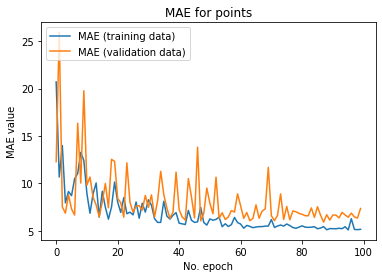

In [21]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for points')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [82]:
val_2_y = r'E:\lambda\labs\ds-test-2\data\transcribed_stories\51--\5101\phase0\Photo 5101.tif.json'
val_2_y = np.array(json.loads(open(val_2_y,'rb').read())["y_label_points"]).reshape((1,8))
print(val_2_y)

val_2_X = r'E:\lambda\labs\ds-test-2\data\transcribed_stories\51--\5101\phase0\Photo 5101.tif.X_input.png'
val_2_X = cv2.cvtColor(cv2.imread(val_2_X),cv2.COLOR_RGB2BGR)
model.trainable=True
model.fit(np.array([val_2_X]),val_2_y,epochs=50)
model.trainable=True
guess = model.predict(np.array([val_2_X]))
print(guess)

[[ 28.43773585  20.54545455 190.5509434   18.36363636 187.47169811
  206.          27.16981132 199.27272727]]
Epoch 1/50
1/1 [==============================] - 0s 41ms/step - loss: 2.0663
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 3.1436
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 1.4258
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 3.9868
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 2.9234
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 4.6785
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 5.4550

In [83]:
guess = np.round(guess.reshape((4,2))).astype("uint8")
print(guess)
print(guess[:,0])
a = guess[:,0]= np.max()
selection = guess[:,0] >= 192
print(selection)
print("what: ",guess[:, [True,False]])
guess = guess[:, [True,False]] = 0
print(guess)
guess[0,guess[0,:]>192] = 192

val_2_X[(guess[0][1]),guess[0][0]]=[255,0,0]
val_2_X[(guess[1][1]),guess[1][0]]=[255,0,0]
val_2_X[(guess[2][1]),guess[2][0]]=[255,0,0]
val_2_X[(guess[3][1]),guess[3][0]]=[255,0,0]
print(guess)
plt.imshow(val_2_X)

[[ 29  20]
 [197  16]
 [192 212]
 [ 26 203]]
[ 29 197 192  26]
[False  True  True False]
what:  [[ 29]
 [197]
 [192]
 [ 26]]


TypeError: 'int' object does not support item assignment